In [53]:
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from mpl_toolkits.basemap import Basemap


In [55]:
from csv import reader
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings, os
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
sns.set_palette({'#30a2da',"#fc4f30","#e5ae38", "#6d904f", "#8b8b8b"})
import folium
from sklearn.cluster import KMeans

In [4]:
crimes = pd.read_csv("D:\\PSU\\8thLaiOfferProjects\\02172019DSHomework01\\Police_Department_Incident_Reports__Historical_2003_to_May_2018total.csv")

In [5]:
crimes.head(20)

IncidntNum         Category                                   Descript  \
0    150060275     NON-CRIMINAL                              LOST PROPERTY   
1    150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2    150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3    150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4    150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
5    150098232     NON-CRIMINAL       AIDED CASE -PROPERTY FOR DESTRUCTION   
6    150098248  SECONDARY CODES                          DOMESTIC VIOLENCE   
7    150098248        VANDALISM              MALICIOUS MISCHIEF, VANDALISM   
8    150098254         BURGLARY          BURGLARY OF STORE, UNLAWFUL ENTRY   
9    150098260    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
10   150098345    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
11   150098345    DRUG/NARCOTIC             POSSESSION OF METH-AMPHETAMINE   
12   150098345    DRUG/NARCOTIC      POSSESSION OF NARCOTICS PARAPHERNALIA   
13   150098345         WARRANTS                             WARRANT ARREST   
14   150098367          ROBBERY                ROBBERY, ARMED WITH A KNIFE   
15   150098373    VEHICLE THEFT                          STOLEN AUTOMOBILE   
16   150098373     NON-CRIMINAL                             FOUND PROPERTY   
17   150098389         WARRANTS            ENROUTE TO OUTSIDE JURISDICTION   
18   150098395    LARCENY/THEFT               PETTY THEFT FROM LOCKED AUTO   
19   150098408   OTHER OFFENSES      DRIVERS LICENSE, SUSPENDED OR REVOKED   

   DayOfWeek        Date   Time  PdDistrict      Resolution  \
0     Monday  01/19/2015  14:00     MISSION            NONE   
1     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
2     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
3     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
4    Tuesday  01/27/2015  19:00    NORTHERN            NONE   
5     Sunday  02/01/2015  16:21    RICHMOND            NONE   
6   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
7   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
8   Saturday  01/31/2015  16:09     CENTRAL            NONE   
9   Saturday  01/31/2015  17:00     CENTRAL            NONE   
10    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
11    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
12    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
13    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
14    Sunday  02/01/2015  16:20     MISSION            NONE   
15    Sunday  02/01/2015  12:45    NORTHERN            NONE   
16    Sunday  02/01/2015  12:45    NORTHERN            NONE   
17    Sunday  02/01/2015  16:38     BAYVIEW  ARREST, BOOKED   
18    Sunday  02/01/2015  14:30        PARK            NONE   
19    Sunday  02/01/2015  17:25     BAYVIEW  ARREST, BOOKED   

                                Address           X          Y  \
0                 18TH ST / VALENCIA ST -122.421582  37.761701   
1           300 Block of LEAVENWORTH ST -122.414406  37.784191   
2           300 Block of LEAVENWORTH ST -122.414406  37.784191   
3           300 Block of LEAVENWORTH ST -122.414406  37.784191   
4                LOMBARD ST / LAGUNA ST -122.431119  37.800469   
5                400 Block of LOCUST ST -122.451782  37.787085   
6              700 Block of KIRKWOOD AV -122.374019  37.729203   
7              700 Block of KIRKWOOD AV -122.374019  37.729203   
8              200 Block of STOCKTON ST -122.406568  37.787809   
9                 800 Block of GEARY ST -122.417295  37.786258   
10            1700 Block of HARRISON ST -122.413354  37.769075   
11            1700 Block of HARRISON ST -122.413354  37.769075   
12            1700 Block of HARRISON ST -122.413354  37.769075   
13            1700 Block of HARRISON ST -122.413354  37.769075   
14              2200 Block of MARKET ST -122.432198

In [6]:
crimes.shape

(2215024, 13)

In [7]:
crimes.describe()

IncidntNum             X             Y          PdId
count  2.215024e+06  2.215024e+06  2.215024e+06  2.215024e+06
mean   1.040728e+08 -1.224229e+02  3.777076e+01  1.040728e+13
std    4.612827e+07  2.983459e-02  4.203596e-01  4.612827e+12
min    3.979000e+03 -1.225136e+02  3.770788e+01  3.979630e+08
25%    6.124170e+07 -1.224332e+02  3.775302e+01  6.124170e+12
50%    1.011558e+08 -1.224166e+02  3.777542e+01  1.011558e+13
75%    1.409256e+08 -1.224069e+02  3.778448e+01  1.409256e+13
max    9.915824e+08 -1.205000e+02  9.000000e+01  9.915824e+13

(37.7078790224135, 37.819975492297004)

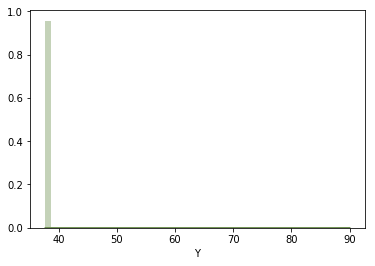

In [31]:
district_count=pd.DataFrame(crimes.groupby("Category").size().sort_values(ascending=False).rename("counts").reset_index())
district_count.head(20)
sns.distplot(crimes.Y)
smallcrime.X.min(), smallcrime.X.max()
smallcrime.Y.min(), smallcrime.Y.max()

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=1600686.4336119255,974868.4619852831,1616178.0763963806,988879.1086851868&bboxSR=2770&imageSR=2770&size=1500,1356&dpi=96&format=png32&transparent=true&f=image


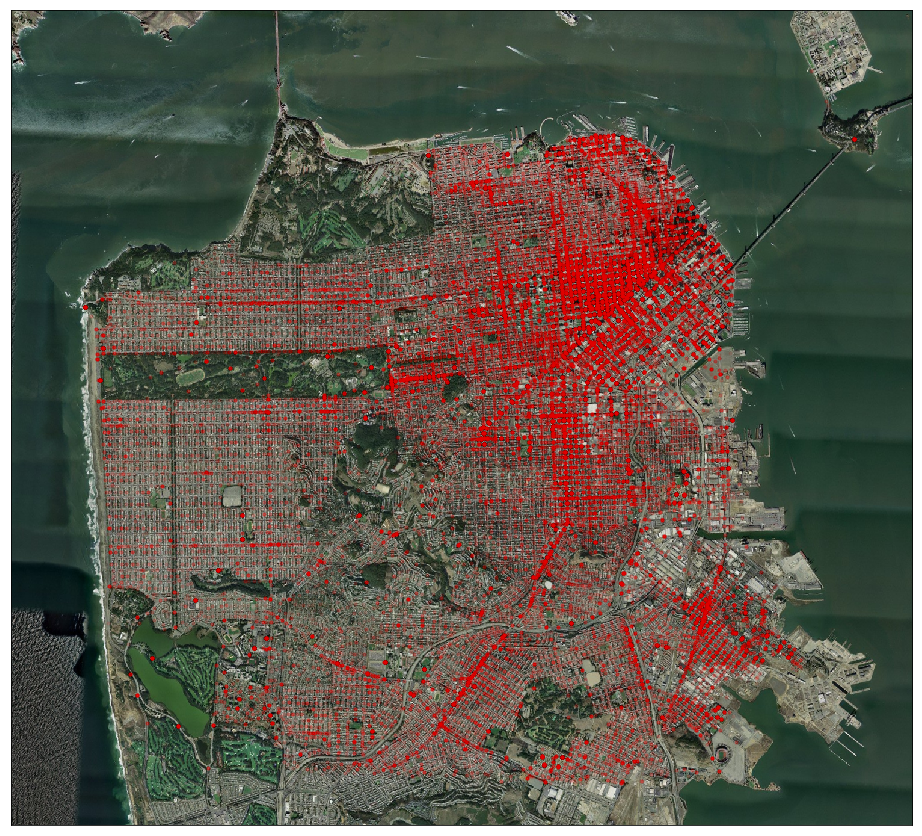

In [100]:
# import basemap
smallcrime = crimes.head(221500)
m = Basemap(projection='mill', llcrnrlat=smallcrime.Y.min()-0.01,
            urcrnrlat=smallcrime.Y.max()+0.01,
            llcrnrlon=smallcrime.X.min()-.01,
            urcrnrlon=smallcrime.X.max()+.01, resolution="c",
            epsg=2770)
x,y = m(tuple(smallcrime.X[(smallcrime.X.isnull()==False)]), 
        tuple(smallcrime.Y[(smallcrime.Y.isnull()==False)]))
plt.figure(figsize=(20,15))
m.arcgisimage(service="ESRI_Imagery_World_2D",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=3,alpha=0.03,color="red")
plt.savefig('foo1.png')
# NatGeo_World_Map

In [90]:
assault = crimes['Category']=='ASSAULT'
dfassault = crimes[assault]
# dfassault.head(10)
remove = dfassault.index[dfassault['Y'] == 90].tolist()

dfassault = dfassault.drop(remove)
dfassault.Y.describe()

count    194685.000000
mean         37.763810
std           0.025546
min          37.707879
25%          37.743538
50%          37.772313
75%          37.783570
max          37.819975
Name: Y, dtype: float64

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=1600686.4336097192,974868.4619853821,1616108.504731585,986657.1335060897&bboxSR=2770&imageSR=2770&size=1500,1146&dpi=96&format=png32&transparent=true&f=image


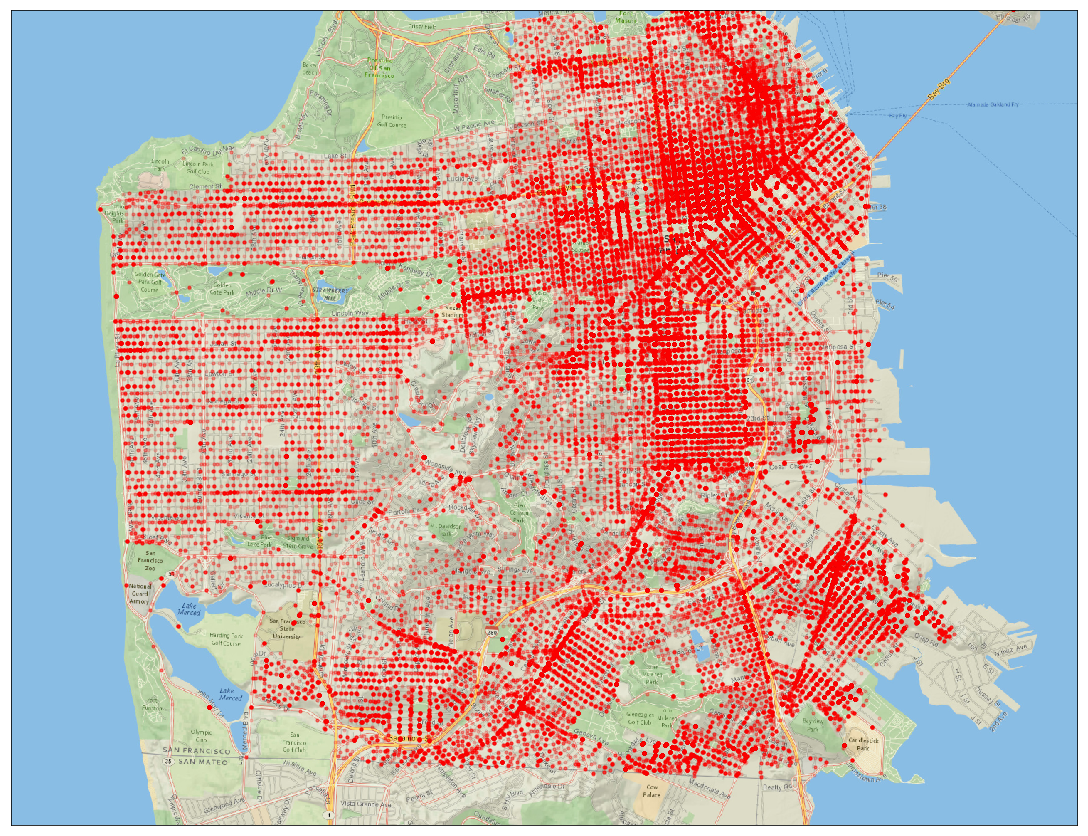

In [99]:
m = Basemap(projection='mill',llcrnrlat=dfassault.Y.min()-0.01,
            urcrnrlat=dfassault.Y.max()-.01,
            llcrnrlon=dfassault.X.min()-.01,
            urcrnrlon=dfassault.X.max()+.01, resolution="c",
            epsg=2770)

x,y = m(tuple(dfassault.X[(dfassault.X.isnull()==False)]), 
        tuple(dfassault.Y[(dfassault.Y.isnull()==False)]))
plt.figure(figsize=(20,15))
m.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=3,alpha=0.2,color="red")
plt.savefig('foo.png')

In [222]:
counts = dfassault.groupby('PdDistrict').count()
means = dfassault.groupby('PdDistrict').mean()
X = means.X.to_frame().reset_index()
Y = means.Y.to_frame().reset_index()
counts = counts.IncidntNum.to_frame().reset_index()
location = pd.merge(X, Y, on="PdDistrict")
dfheat = pd.merge(location, counts, on="PdDistrict")
dfheat

PdDistrict           X          Y  IncidntNum
0     BAYVIEW -122.392148  37.734955       24809
1     CENTRAL -122.409663  37.795317       17608
2   INGLESIDE -122.427285  37.724534       21970
3     MISSION -122.419033  37.759495       28791
4    NORTHERN -122.426064  37.785329       21057
5        PARK -122.445111  37.770124        8637
6    RICHMOND -122.472209  37.780044        7855
7    SOUTHERN -122.405735  37.779971       31314
8     TARAVAL -122.476928  37.736897       13732
9  TENDERLOIN -122.412825  37.783716       18912

In [334]:
# Tutorial from Github:
# https://github.com/python-visualization/folium/blob/master/examples/Heatmap.ipynb
# https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/
# https://alcidanalytics.com/p/geographic-heatmap-in-python
# https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf
    
location = dfassault[['X','Y','Category','IncidntNum']]
location.head(10)
location.shape

from folium.plugins import HeatMap

ma = folium.Map([dfheat.Y.mean(), dfheat.X.mean()], 
                tiles='OpenStreetMap', zoom_start=11)
# stamentoner
# OpenStreetMap

dfheatmap = dfheat.drop(columns=['PdDistrict'])
HeatMap(list(zip(dfheat.Y, dfheat.X, dfheat.IncidntNum)),
       min_opacity=.2,
       max_val = dfheat.IncidntNum.max(),
       radius=20, blur=25,
       max_zoom=10,
       ).add_to(ma)
ma

In [280]:
crimes.datetimes1 = pd.to_datetime(crimes.Date, format='%m/%d/%Y')
crimes.datetimes2 = pd.to_datetime(crimes.Time, format='%H:%M')
crimes['month'] = crimes.datetimes1.apply(lambda x:x.month)
crimes['day'] = crimes.datetimes1.apply(lambda x:x.day)
crimes['year'] = crimes.datetimes1.apply(lambda x:x.year)
crimes['hour'] = crimes.datetimes2.apply(lambda x:x.hour)
crimes['minute'] = crimes.datetimes2.apply(lambda x:x.minute)


In [281]:
crimes.head(15)

IncidntNum         Category                                   Descript  \
0    150060275     NON-CRIMINAL                              LOST PROPERTY   
1    150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2    150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3    150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4    150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
5    150098232     NON-CRIMINAL       AIDED CASE -PROPERTY FOR DESTRUCTION   
6    150098248  SECONDARY CODES                          DOMESTIC VIOLENCE   
7    150098248        VANDALISM              MALICIOUS MISCHIEF, VANDALISM   
8    150098254         BURGLARY          BURGLARY OF STORE, UNLAWFUL ENTRY   
9    150098260    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
10   150098345    LARCENY/THEFT                    PETTY THEFT SHOPLIFTING   
11   150098345    DRUG/NARCOTIC             POSSESSION OF METH-AMPHETAMINE   
12   150098345    DRUG/NARCOTIC      POSSESSION OF NARCOTICS PARAPHERNALIA   
13   150098345         WARRANTS                             WARRANT ARREST   
14   150098367          ROBBERY                ROBBERY, ARMED WITH A KNIFE   

   DayOfWeek        Date   Time  PdDistrict      Resolution  \
0     Monday  01/19/2015  14:00     MISSION            NONE   
1     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
2     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
3     Sunday  02/01/2015  15:45  TENDERLOIN            NONE   
4    Tuesday  01/27/2015  19:00    NORTHERN            NONE   
5     Sunday  02/01/2015  16:21    RICHMOND            NONE   
6   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
7   Saturday  01/31/2015  21:00     BAYVIEW            NONE   
8   Saturday  01/31/2015  16:09     CENTRAL            NONE   
9   Saturday  01/31/2015  17:00     CENTRAL            NONE   
10    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
11    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
12    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
13    Sunday  02/01/2015  14:00     MISSION  ARREST, BOOKED   
14    Sunday  02/01/2015  16:20     MISSION            NONE   

                        Address           X          Y  \
0         18TH ST / VALENCIA ST -122.421582  37.761701   
1   300 Block of LEAVENWORTH ST -122.414406  37.784191   
2   300 Block of LEAVENWORTH ST -122.414406  37.784191   
3   300 Block of LEAVENWORTH ST -122.414406  37.784191   
4        LOMBARD ST / LAGUNA ST -122.431119  37.800469   
5        400 Block of LOCUST ST -122.451782  37.787085   
6      700 Block of KIRKWOOD AV -122.374019  37.729203   
7      700 Block of KIRKWOOD AV -122.374019  37.729203   
8      200 Block of STOCKTON ST -122.406568  37.787809   
9         800 Block of GEARY ST -122.417295  37.786258   
10    1700 Block of HARRISON ST -122.413354  37.769075   
11    1700 Block of HARRISON ST -122.413354  37.769075   
12    1700 Block of HARRISON ST -122.413354  37.769075   
13    1700 Block of HARRISON ST -122.413354  37.769075   
14      2200 Block of MARKET ST -122.432198  37.765111   

                                 Location            PdId  month  day  year  \
0    (37.7617007179518, -122.42158168137)  15006027571000      1   19  2015   
1   (37.7841907151119, -122.414406029855)  15009821003074      2    1  2015   
2   (37.7841907151119, -122.414406029855)  15009821004014      2    1  2015   
3   (37.7841907151119, -122.414406029855)  15009821015200      2    1  2015   
4   (37.8004687042875, -122.431118543788)  15009822628160      1   27  2015   
5   (37.7870853907529, -122.451781767894)  15009823251041      2    1  2015   
6    (37.729203356539, -122.374019331833)  15009824815200      1   31  2015   
7    (37.729203356539, -122.374019331833)  15009824828150      1   31  2015   
8    (37.7878092959561, -122.40656817787)  15009825405053      1   31  2015   
9   (37.7862578545865, -122

In [282]:
# define a function to generate map
def generateBaseMap(default_location=[crimes.Y.mean(), crimes.X.mean()], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [283]:
base_map = generateBaseMap()
base_map # show the geographical map

In [408]:
from folium.plugins import HeatMap
counts = crimes.sample(frac=0.01, replace=True, random_state=1).groupby(['Y','X']).count()['IncidntNum']
# 这里为什么要做一次 sampling？ 因为 crimes这个数据集有2000000+的数据，量太大，
# 导致之后的 add_to 函数崩溃。多次尝试发现上线大概在 20000 左右（可能更高）
# 所以对 crimes 样本做了有放回的 抽样，抽样数量为 1%

counts = counts.to_frame().reset_index()
counts.head()
counts.shape

# remove outliers ( latitude == 90)
remove = counts.index[counts['Y'] == 90].tolist()
counts = counts.drop(remove)
counts.Y.describe()

base_map = generateBaseMap()
HeatMap(counts.values.tolist(),
       min_opacity=.2,
       max_val = counts.IncidntNum.max(),
       radius=20, blur=25,
       max_zoom=10,
       ).add_to(base_map)
base_map

In [412]:
df_hour_list = []
for hour in crimes.hour.sort_values().unique():
    df_hour_list.append(crimes.loc[crimes.hour == hour, 
                                   ['Y','X']].groupby(['Y','X']).sum().reset_index().values.tolist())


In [414]:
from folium.plugins import HeatMapWithTime
basemap_time = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map